In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import os

In [3]:
os.chdir(r'D:\March 2024\DNN\Day 1')

In [4]:
data_df = pd.read_csv('breast_cancer_mod.csv')
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0


# Visualisation

In [5]:
data_df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

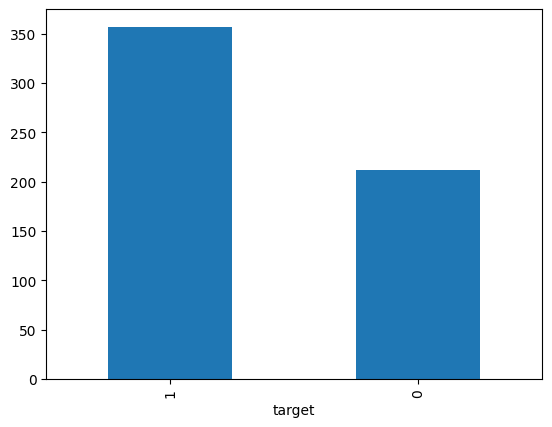

In [7]:
fig, ax = plt.subplots()
data_df['target'].value_counts().plot(ax = ax, kind = 'bar');

# Setup Global Parameters

In [16]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results
TEST_SIZE  = 0.2 # Size of test data

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

###  Class Distribution
212 - Malignant, 357 - Benign

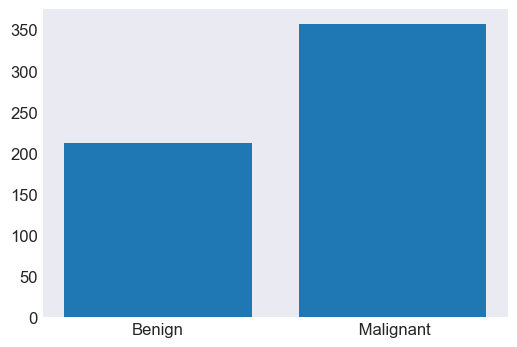

In [17]:
# create list of labels
labels = [' Malignant', 'Benign']

# instantiate figure and axis
fig, ax = plt.subplots(figsize=(6,4))

# plot bars on the axis
ax.bar(data_df['target'].value_counts().index, data_df['target'].value_counts().values)

# Set custom x-axis tick labels
ax.set_xticks(data_df['target'].value_counts().index)

# Add label text
ax.set_xticklabels(labels)

ax.grid();

In [18]:
features = data_df.drop('target', axis = 1)
labels = data_df['target']

# Train Test Split

In [19]:
# Split X and y in train and test sets
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    labels, 
                                                    test_size=TEST_SIZE, # proportion to include in the test split
                                                    stratify = labels,  # split in a stratified fashion, using this as the class labels
                                                    random_state=RANDOM_STATE) # set the random state

# what does shape look like
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(455, 30) (455,) (114, 30) (114,)


In [20]:
X_train['total'] = X_train.astype(np.int16).sum(axis=1)
# We use astype because it can give error for sum
X_train['target'] = y_train
X_train.sort_values('total', inplace= True)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0
6,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,15,0


# Over to MP Neurons
<img src='../../images/dnn_nb_s01_fig1.jpg' width='350' />

IndexError: index 30 is out of bounds for axis 0 with size 30

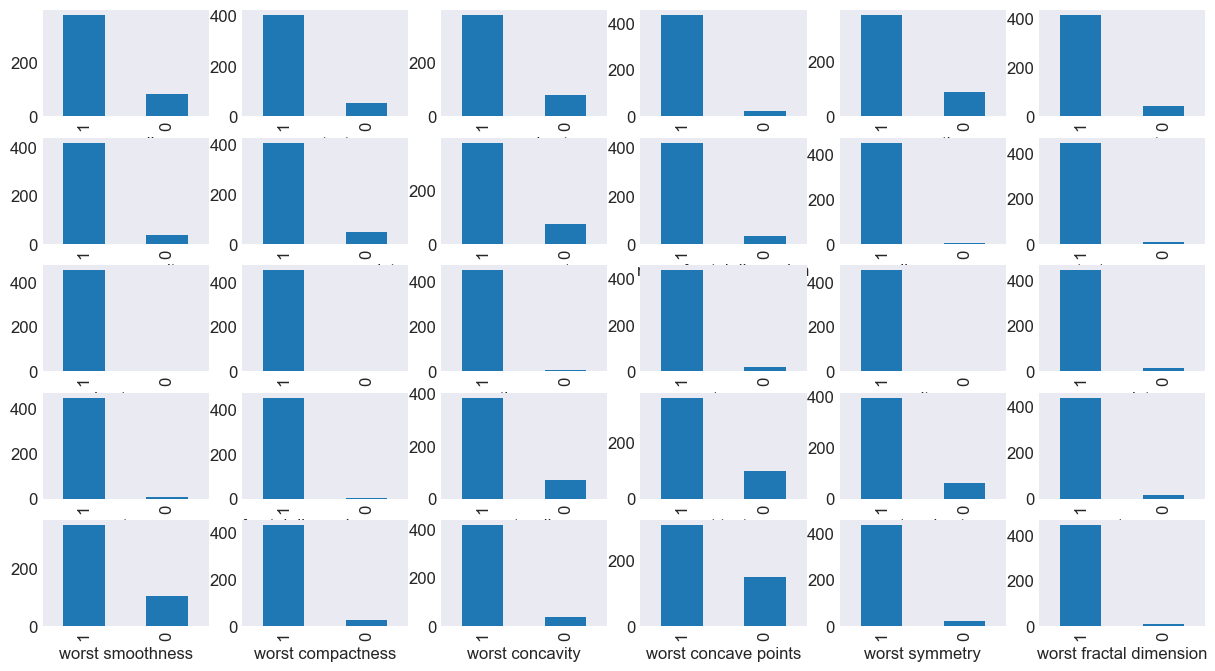

In [21]:
# Plot Training data

fig, axes = plt.subplots(5,6, figsize = (15, 8)) # 5 x 6 = 30 columns

axes = axes.ravel() # convert 2d Array to single dimension

# Iterate all columns and plot individually
for i, col in enumerate(X_train.columns):
    
    ax = X_train[col].value_counts().plot(ax=axes[i], kind='bar');
    
    ax.grid()

plt.tight_layout()

## Training Data

In [22]:
 # create a column with sums
X_train['total'] = X_train.astype(np.int16).sum(axis=1) # convert to integer from object

X_train['target'] = y_train # target column from y_train

X_train.sort_values('total', inplace = True) # sort the values as per total

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,24,0
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,26,0
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,26,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,30,0
6,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,30,0


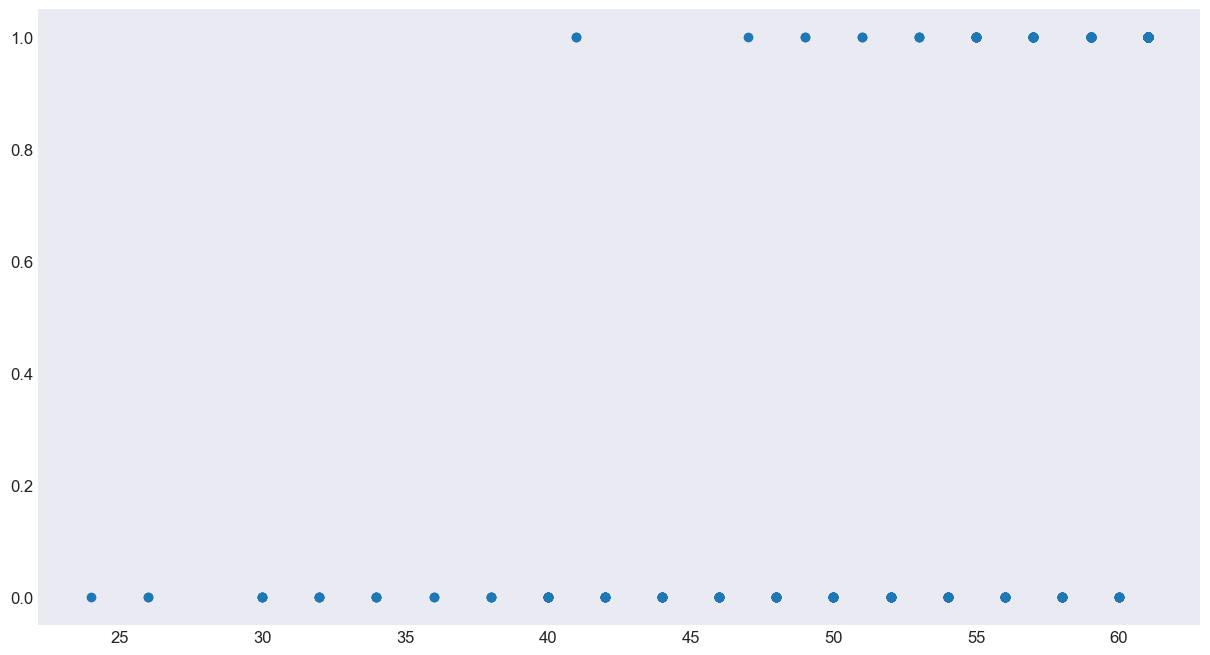

In [23]:
plt.scatter(X_train['total'], X_train['target']);
plt.grid()

In [24]:
# convert to log(odd of target) = np.log(p/(1-p))
# 0.5, 0.731, 1

probs = [1e-8, 0.5, 0.731, 1-1e-8 ]
for prob in probs:
    print ( np.log2 ( prob /(1-prob)) )


-26.57542474467195
0.0
1.4422652333958133
26.575424737422754


## Test Data

In [25]:
# Reapeat the above steps with test dataset
X_test['total'] = X_test.astype(np.int16).sum(axis=1)

X_test['target'] = y_test

X_test.sort_values('total', inplace = True)

X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,14,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,14,0
12,0,1,0,0,0,1,0,0,1,1,...,0,0,1,1,1,0,1,1,16,0
18,0,0,0,1,1,0,0,0,0,1,...,0,1,0,1,1,0,1,1,18,0
35,1,1,1,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,1,20,0


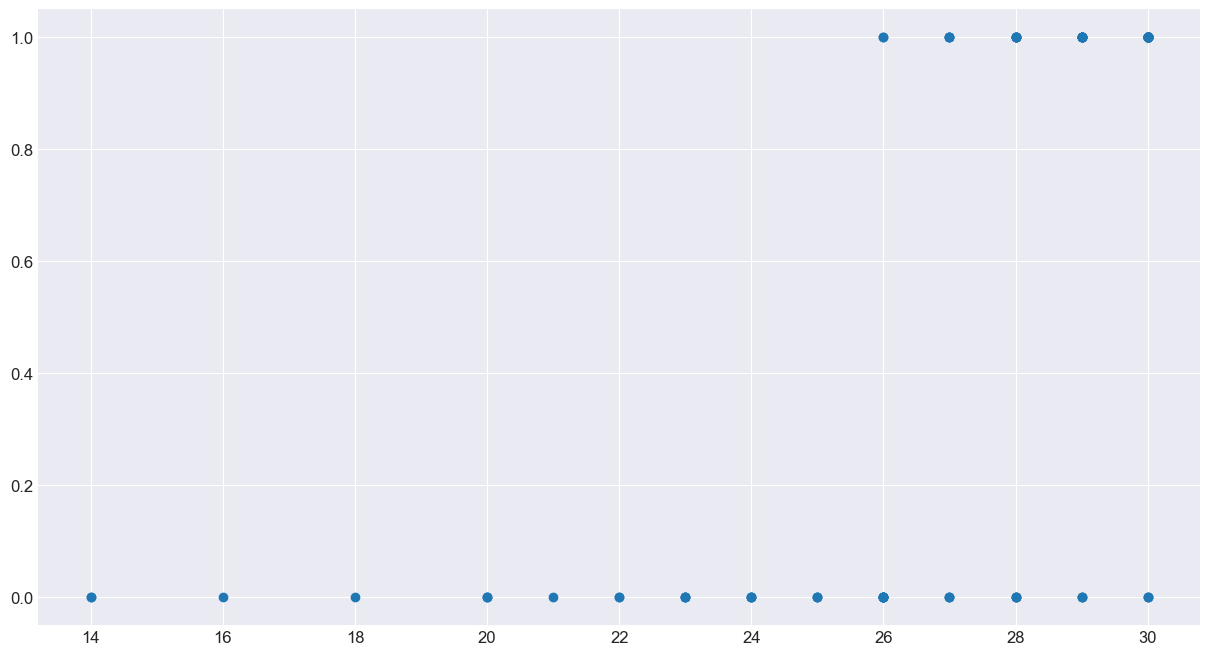

In [26]:
plt.scatter(X_test['total'], X_test['target']);

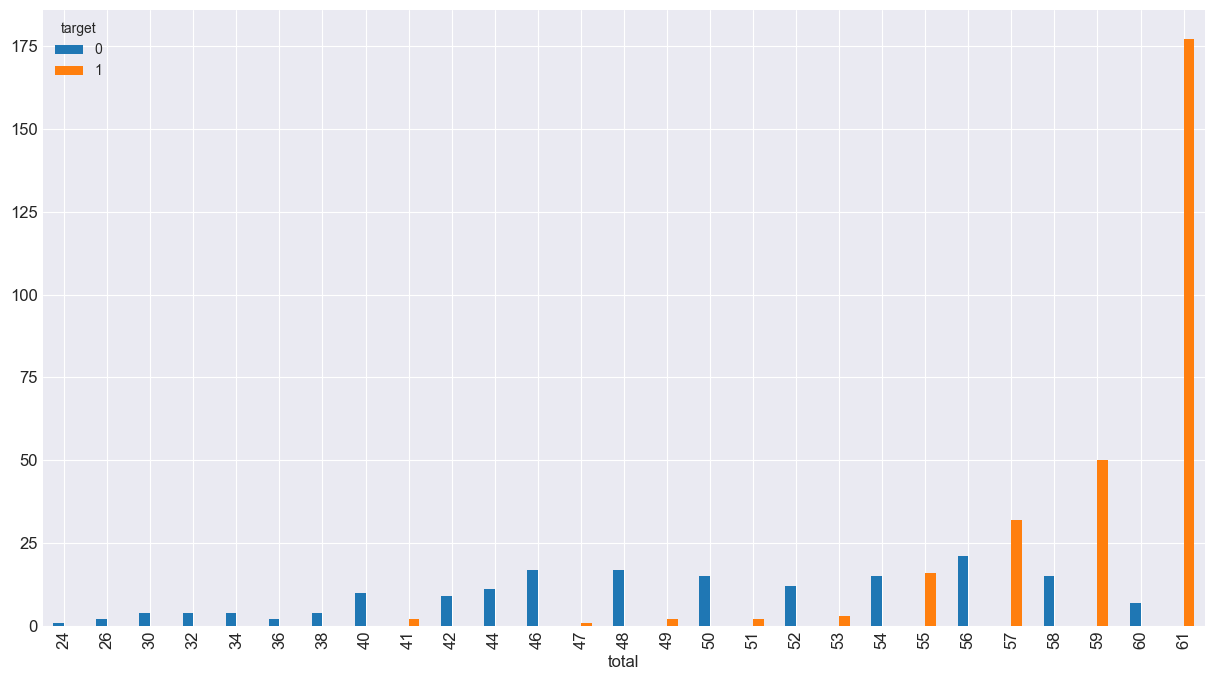

In [27]:
# plot Count of totals in the train set
tmp_df = X_train.groupby(['total', 'target']).agg({'target': 'count'}) # Create a tmp dataframe
tmp_df.columns = ['count'] # rename column
tmp_df.reset_index(inplace = True) # reset index helps
tmp_df.pivot(index='total', columns='target', values='count').plot(kind = 'bar'); # create a pivot and plot

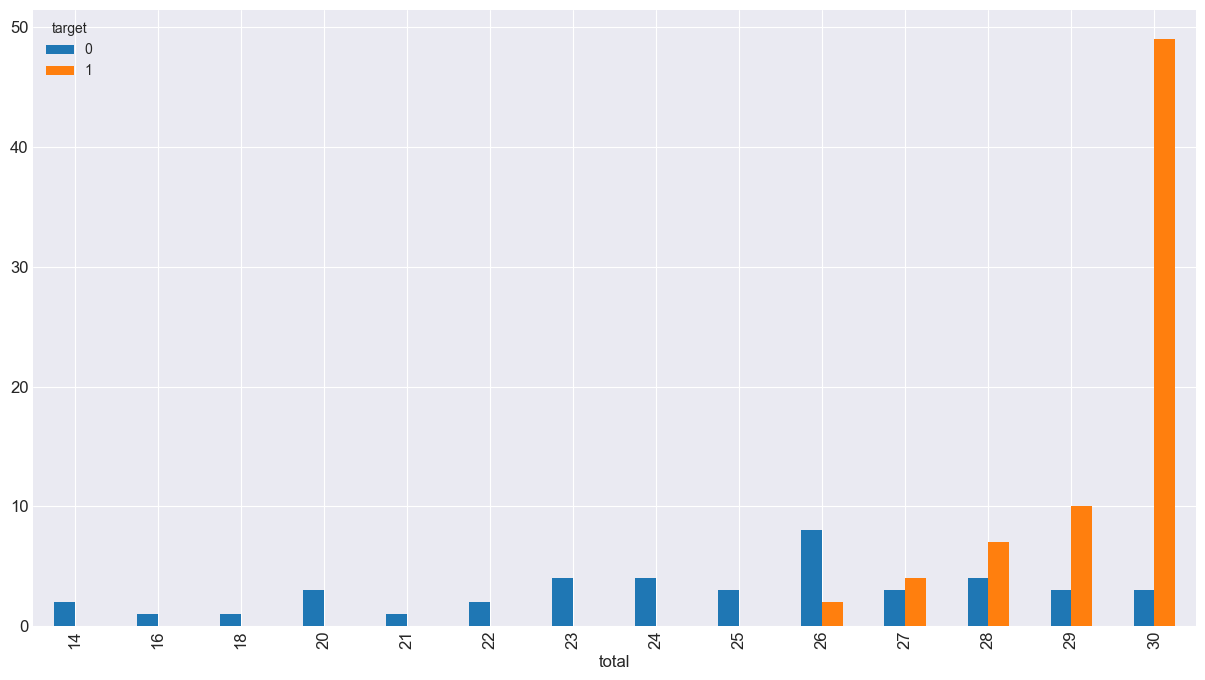

In [28]:
# repeat for test set
tmp_df = X_test.groupby(['total', 'target']).agg({'target': 'count'})
tmp_df.columns = ['count']
tmp_df.reset_index(inplace = True)
tmp_df.pivot(index='total', columns='target', values='count').plot(kind = 'bar');

In [29]:
# Calculate accuracy
accuracy = {}

# loop over the rows
for b in range(X_train.shape[1]):
    X_train['y_pred'] = X_train['total'] >= b # make prediction based on total
    accuracy[b] = accuracy_score(X_train['y_pred'], X_train['target']) # calculate accuracy

In [31]:
best_b = max(accuracy, key = accuracy.get) # find best accuracy
print('Optimal value of b is:', best_b)
print('Highest accuracy is: {0:4.2f} %'.format(accuracy[best_b] *100))

Optimal value of b is: 31
Highest accuracy is: 64.18 %


In [32]:
# Using best b calculate accuracy on test set
X_test['y_pred'] = X_test['total'] >= best_b
test_accuracy = accuracy_score(X_test['y_pred'], X_test['target'])

print ('Accuracy of testing is: {0:4.2f} %'.format(test_accuracy*100))

Accuracy of testing is: 36.84 %


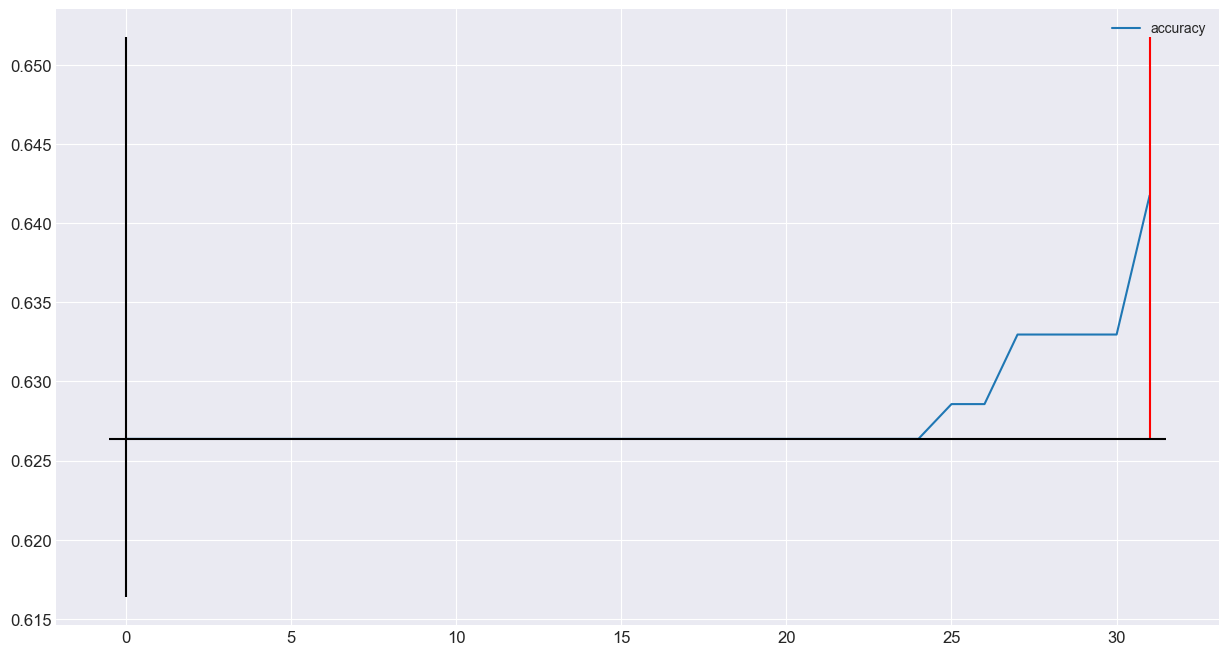

In [33]:
# plot results
ax = pd.DataFrame([accuracy], index = ['accuracy']).T.plot()
ax.vlines( x=best_b, ymin=min(accuracy.values()), ymax=accuracy[best_b]+0.01, colors='r')
ax.vlines( x = 0, ymin=min(accuracy.values())-0.01, ymax=accuracy[best_b]+0.01, colors='k')
ax.hlines( y=min(accuracy.values()), xmin=min(accuracy.keys())-0.5, xmax=max(accuracy.keys())+0.5, colors='k');